<a href="https://colab.research.google.com/github/e-c-centric/56042025_Churning_Customers/blob/main/56042025_Churning_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikeras

In [3]:
import numpy as np
import pandas as pd
import warnings

# Scikit-learn imports
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score
from scipy.stats import randint

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier


In [4]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')
data_copy = data.copy()

In [5]:
warnings.filterwarnings('ignore')

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

**Question 1**

In [10]:
scaler = StandardScaler()

In [11]:
columns_with_missing_values = data.columns[data.isnull().any()].tolist()

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    if column in columns_with_missing_values:
        imputer = SimpleImputer(strategy='mean')
        data[[column]] = imputer.fit_transform(data[[column]])

if 'TotalCharges' in columns_with_missing_values:
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
    data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)
    #data['TotalCharges'] = scaler.fit_transform(data['TotalCharges'])

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_columns.difference(['SeniorCitizen'])] = scaler.fit_transform(data[numerical_columns.difference(['SeniorCitizen'])])

In [12]:
label_encoder = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [13]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [14]:
X_train_scaled = scaler.fit_transform(X)

In [15]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y)

RandomForestClassifier(random_state=42)

In [16]:
k = 10
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y)

selected_feature_names = X.columns[selector.get_support()]

print(f"The {k} most relevant features to a customer churn include:")
for i in selected_feature_names:
  print(i)

The 10 most relevant features to a customer churn include:
SeniorCitizen
Dependents
tenure
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling
MonthlyCharges


In [17]:
final_data = data[selected_feature_names]
if 'TotalCharges' not in selected_feature_names:
  final_data['TotalCharges'] = data['TotalCharges']
final_data['Churn'] = data['Churn']

In [18]:
final_data

,SeniorCitizen,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,-1.277445,0,2,0,0,0,1,-1.160323,2505,0
1,0,0,0.066327,2,0,2,0,1,0,-0.259629,1466,0
2,0,0,-1.236724,2,2,0,0,0,1,-0.362660,157,1
3,0,0,0.514251,2,0,2,2,1,0,-0.746535,1400,0
4,0,0,-1.236724,0,0,0,0,0,1,0.197365,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,-0.340876,2,0,2,2,1,1,0.665992,1597,0
7039,0,1,1.613701,0,2,2,0,1,1,1.277533,5698,0
7040,0,1,-0.870241,2,0,0,0,0,1,-1.168632,2994,0
7041,1,0,-1.155283,0,0,0,0,0,1,0.320338,2660,1


In [19]:
'''print("\nSummary Statistics After Scaling:")
print(final_data[numerical_columns].describe())
#verifying that the numerical columns have been appropriately scaled'''

'print("\nSummary Statistics After Scaling:")\nprint(final_data[numerical_columns].describe())\n#verifying that the numerical columns have been appropriately scaled'

**Question 2**

In [20]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,2505,0
1,3962,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,1466,0
2,2564,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,157,1
3,5535,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,1400,0
4,6511,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,-0.340876,1,2,0,2,...,2,2,2,2,1,1,3,0.665992,1597,0
7039,1525,0,0,1,1,1.613701,1,2,1,0,...,2,0,2,2,1,1,1,1.277533,5698,0
7040,3367,0,0,1,1,-0.870241,0,1,0,2,...,0,0,0,0,0,1,2,-1.168632,2994,0
7041,5934,1,1,1,0,-1.155283,1,2,1,0,...,0,0,0,0,0,1,3,0.320338,2660,1


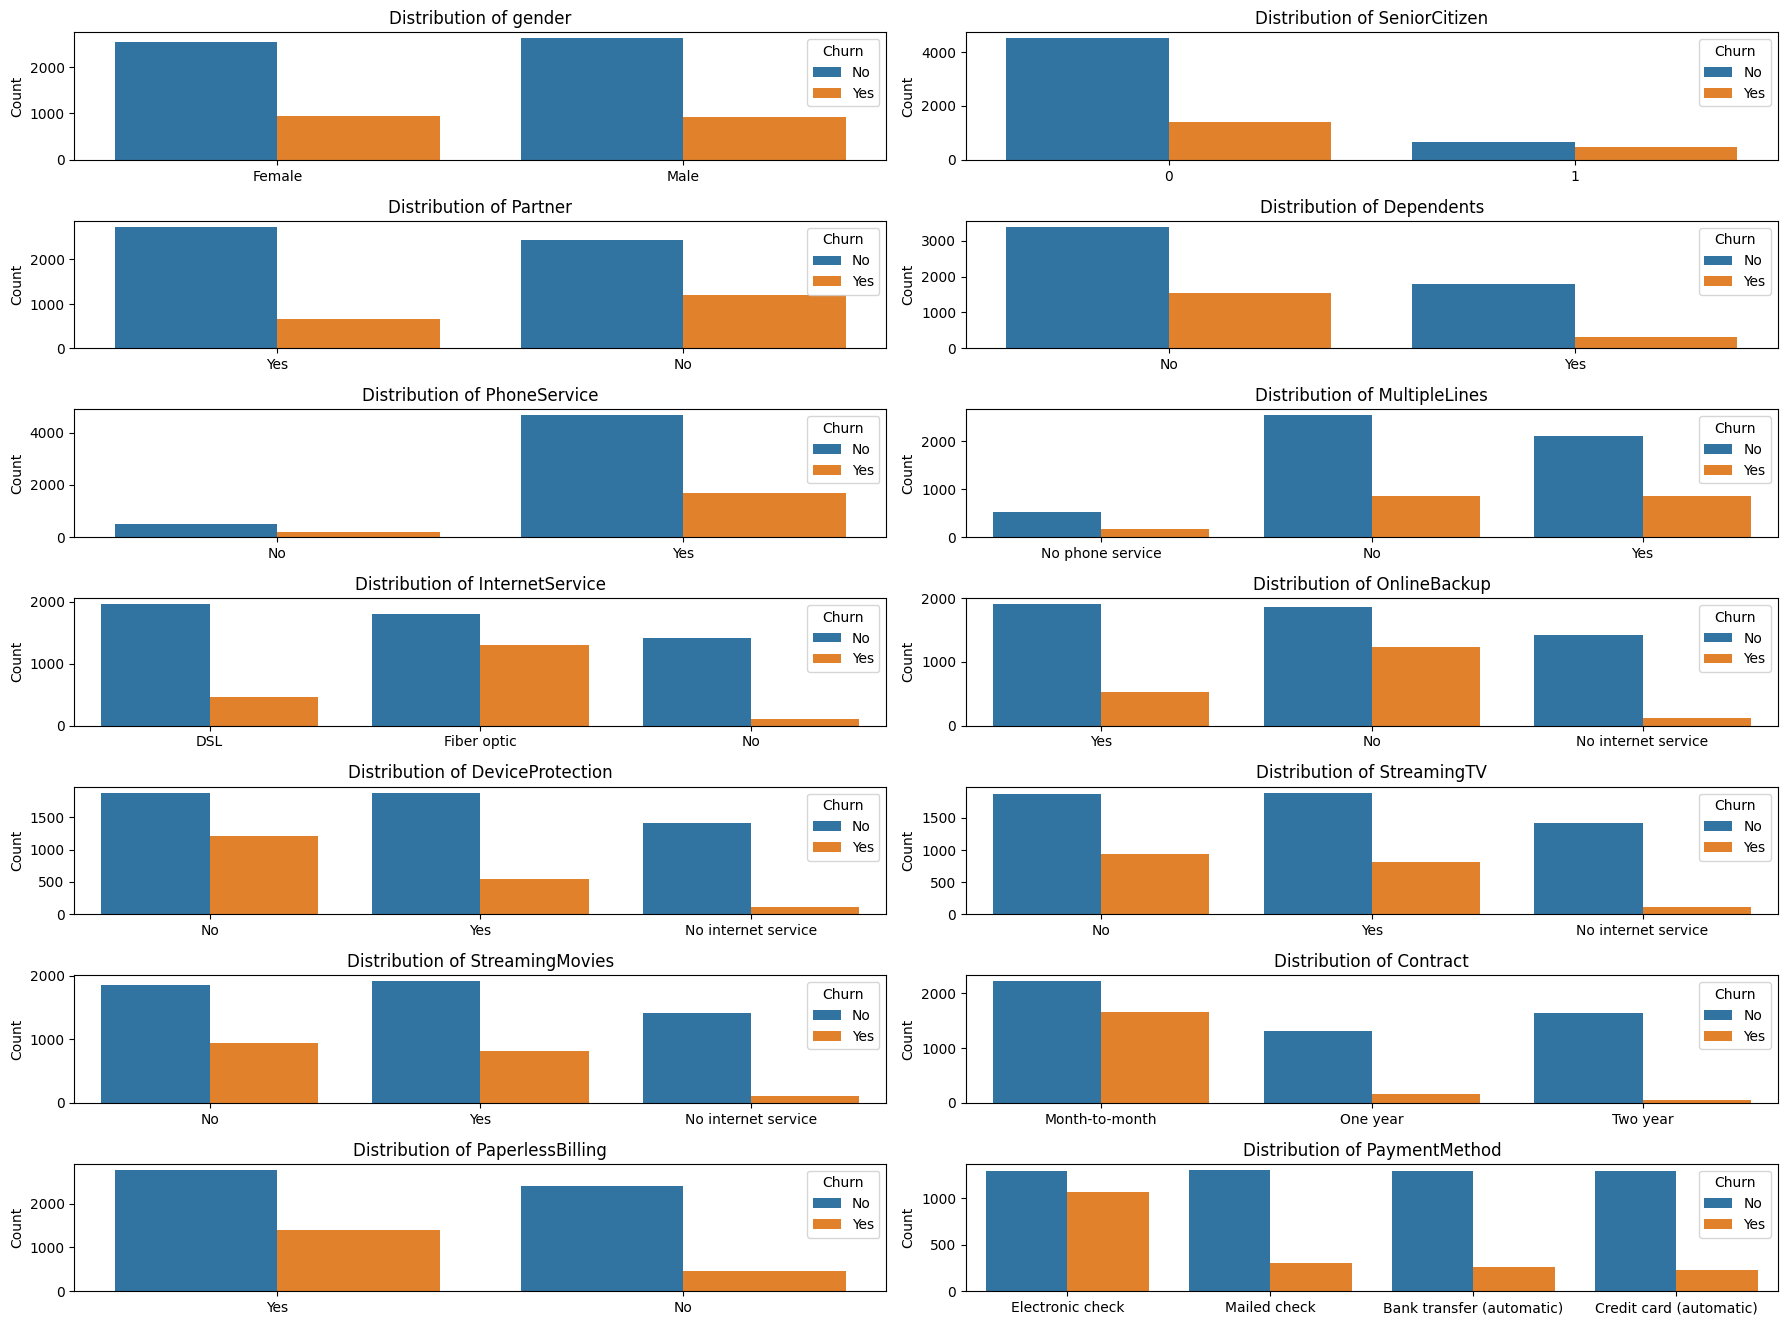

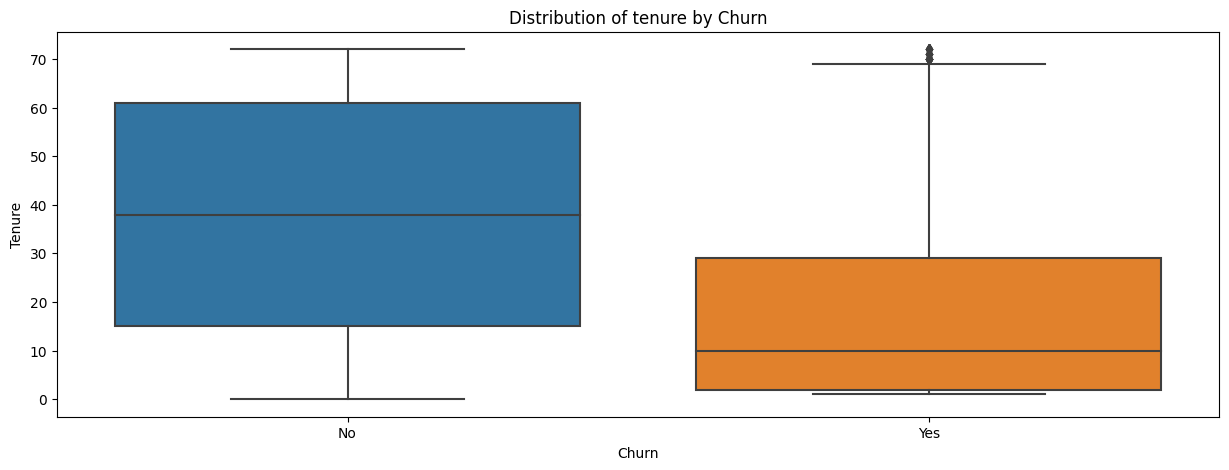

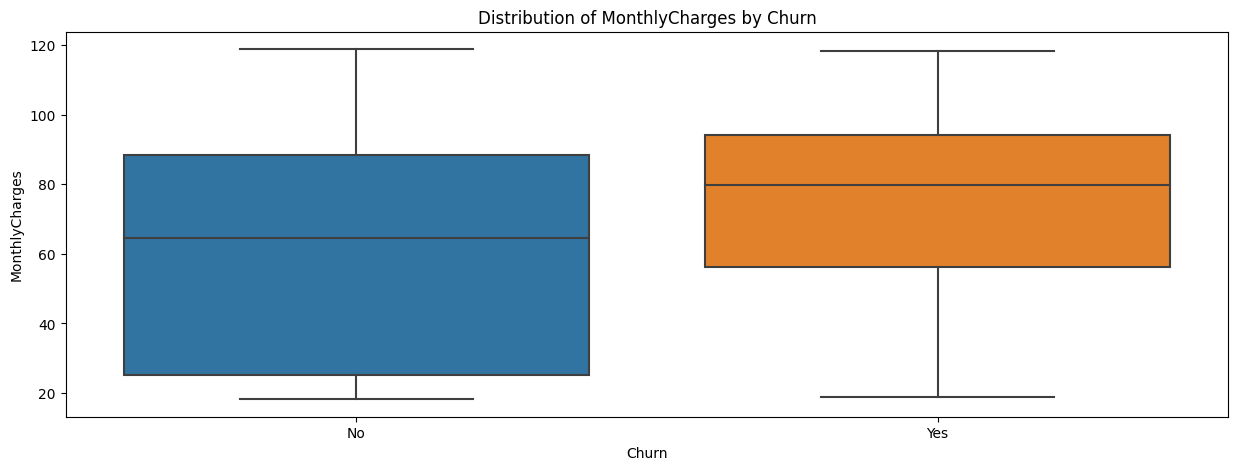

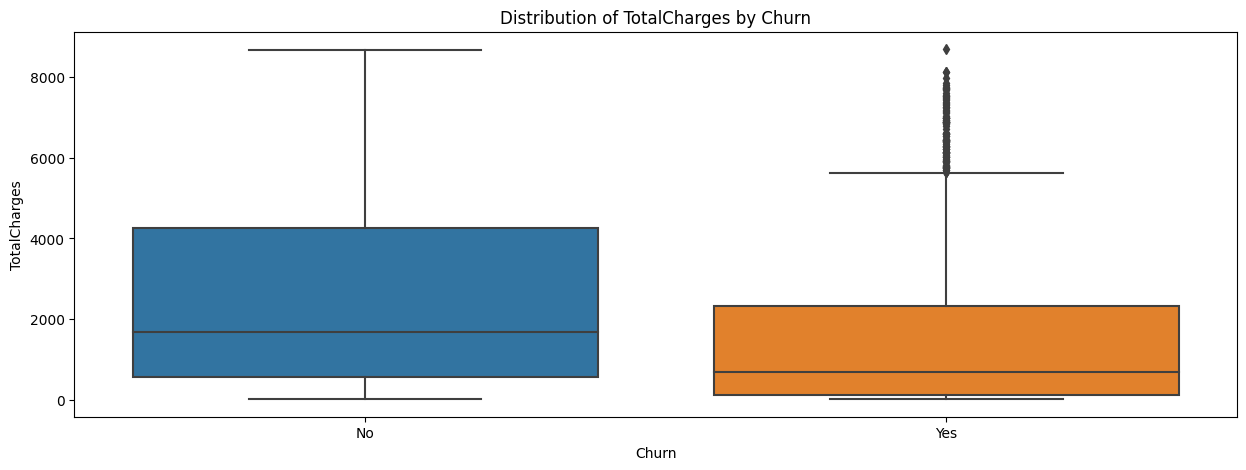


Churn Proportions for gender:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

Churn Proportions for SeniorCitizen:
Churn                No       Yes
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813

Churn Proportions for Partner:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Churn Proportions for Dependents:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

Churn Proportions for PhoneService:
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

Churn Proportions for MultipleLines:
Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0

In [21]:
#categorical variables only
columns_to_analyze = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
                      'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                      'PaymentMethod', 'Churn']

analysis_data = data_copy[columns_to_analyze]

# Visualizing the distribution of all variables with respect to churn
plt.figure(figsize=(18, 15))
for i, column in enumerate(analysis_data.columns[:-1]):
    plt.subplot(8, 2, i + 1)
    sns.countplot(x=column, hue='Churn', data=analysis_data)
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Visualizations for numerical variables
plt.figure(figsize=(15, 5))
sns.boxplot(x='Churn', y='tenure', data=data_copy)
plt.title('Distribution of tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data_copy)
plt.title('Distribution of MonthlyCharges by Churn')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.show()

data_copy['TotalCharges'] = pd.to_numeric(data_copy['TotalCharges'], errors='coerce')

plt.figure(figsize=(15, 5))
sns.boxplot(x='Churn', y='TotalCharges', data=data_copy)
plt.title('Distribution of TotalCharges by Churn')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()

for column in analysis_data.columns[:-1]:
    churn_proportions = analysis_data.groupby([column, 'Churn'],group_keys = False).size().groupby(level=0,group_keys = False).apply(lambda x: x / x.sum()).unstack()
    print(f"\nChurn Proportions for {column}:")
    print(churn_proportions)

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in numerical_columns:
    print(f"\nSummary Statistics for {column}:")

    for churn_category in ['No', 'Yes']:
        subset_data = data_copy[data_copy['Churn'] == churn_category]

        q1 = subset_data[column].quantile(0.25)
        q2 = subset_data[column].median()
        q3 = subset_data[column].quantile(0.75)
        iqr = q3 - q1
        data_range = subset_data[column].max() - subset_data[column].min()
        mean = subset_data[column].mean()

        print(f"\nChurn = {churn_category}:")
        print(f"Q1: {q1:.2f}")
        print(f"Q2 (Median): {q2:.2f}")
        print(f"Q3: {q3:.2f}")
        print(f"IQR: {iqr:.2f}")
        print(f"Range: {data_range:.2f}")
        print(f"Mean: {mean:.2f}")


## **Conclusion Drawn From Charts and Distribution Proprtions:**

###1. Gender: Churning proportions are relatively similar between genders, with slightly higher churn among males (26.16%) compared to females (26.92%).

###2. Senior Citizen: Senior citizens have a significantly higher churn rate (41.68%) compared to non-senior citizens (23.61%).

###3. Partner: Customers without a partner (32.96%) tend to churn more than those with a partner (19.67%).

###4. Dependents: Customers without dependents (31.28%) are more likely to churn than those with dependents (15.45%).

###5. Phone Service: Customers without phone service (24.93%) have slightly higher churn than those with phone service (26.71%).

###6. Multiple Lines: Customers with multiple lines (28.61%) churn more than those without (25.04%).

###7. Internet Service: Fiber optic users (41.89%) have a significantly higher churn rate than DSL users (18.96%) or customers with no internet service (7.41%).

###8. Online Backup, Device Protection, Streaming TV, Streaming Movies: Customers without these additional services tend to churn more compared to those with these services.

###9. Contract: Month-to-month contract customers (42.71%) have a higher churn rate compared to one-year (11.27%) and two-year (2.83%) contract customers.

###10. Paperless Billing: Customers with paperless billing (33.57%) have a higher churn rate compared to those without (16.33%).

###11. Payment Method: Customers using electronic checks (45.29%) have a higher churn rate compared to other payment methods.

###12. Tenure: Customers who churn tend to have significantly shorter tenure periods. The median tenure for churned customers is 10.00 months, whereas non-churned customers have a median tenure of 38.00 months.

###13. Monthly Charges: Churned customers generally experience higher monthly charges. The median monthly charge for churned customers is 79.65, compared to 64.43 for non-churned customers.

###14. Total Charges: Churned customers tend to have lower total charges. The median total charge for churned customers is 703.55, while non-churned customers have a median total charge of 1683.60.

-

#Comparing these observations with the features selected using feature importance reveals that the customer profiles most likely to churn are:
- 1. Customers with shorter tenure periods.
- 2. Customers with higher monthly bills.
- 4. Customers on month-to-month contracts.
- 5. Customers opting for paper billing.
- 6. Senior citizens
- 6. Customers without dependents.
- 7. Customers without online security, online backup, device protection, and tech support.


**Question 3**

In [22]:
X = final_data.drop('Churn', axis=1)
y = final_data['Churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [23]:
def create_mlp_model(optimizer='adam'):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer_1 = Dense(32, activation='relu')(input_layer)
    hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [24]:
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense(6, activation='relu')(hidden_layer_3)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_4)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=36, batch_size=32, validation_data=(X_test, y_test))

_, accuracy = model.evaluate(X_train, y_train)
print(accuracy*100)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

Epoch 1/36
177/177 [==============================] - 4s 8ms/step - loss: 0.6363 - accuracy: 0.6731 - val_loss: 0.5733 - val_accuracy: 0.7353
Epoch 2/36
177/177 [==============================] - 1s 7ms/step - loss: 0.5415 - accuracy: 0.7343 - val_loss: 0.5053 - val_accuracy: 0.7353
Epoch 3/36
177/177 [==============================] - 1s 7ms/step - loss: 0.4972 - accuracy: 0.7345 - val_loss: 0.4733 - val_accuracy: 0.7353
Epoch 4/36
177/177 [==============================] - 1s 5ms/step - loss: 0.4756 - accuracy: 0.7345 - val_loss: 0.4562 - val_accuracy: 0.7353
Epoch 5/36
177/177 [==============================] - 1s 5ms/step - loss: 0.4638 - accuracy: 0.7345 - val_loss: 0.4460 - val_accuracy: 0.7353
Epoch 6/36
177/177 [==============================] - 1s 5ms/step - loss: 0.4568 - accuracy: 0.7345 - val_loss: 0.4400 - val_accuracy: 0.7353
Epoch 7/36
177/177 [==============================] - 1s 5ms/step - loss: 0.4529 - accuracy: 0.7345 - val_loss: 0.4366 - val_accuracy: 0.7353
Epoch 

In [25]:
mlp_model = KerasClassifier(build_fn=create_mlp_model, epochs=10, batch_size=16, verbose=0)

param_grid = {'batch_size': [16, 32],
              'epochs': [20, 30],
              'optimizer': ['adam', 'sgd','rmsprop']}

cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=cv)

grid_result = grid.fit(X_train, y_train)

print("Best Parameters: ", grid_result.best_params_)

Best Parameters:  {'batch_size': 16, 'epochs': 20, 'optimizer': 'rmsprop'}


**Question 4**

In [26]:
best_params = grid_result.best_params_

optimized_model1 = create_mlp_model(optimizer=best_params['optimizer'])
optimized_model1.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

y_pred = optimized_model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred.round())
print("Model’s accuracy: {:.2f}%".format(accuracy * 100))

auc_score = roc_auc_score(y_test, y_pred)
print("AUC score: {:.4f}".format(auc_score))

45/45 [==============================] - 0s 2ms/step
Model’s accuracy: 81.19%
AUC score: 0.8496


In [27]:
param_dist = {
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'units': randint(32, 128),
    'dropout_rate': [0.0, 0.1, 0.2],
}

def create_tuned_mlp_model(units=64, dropout_rate=0.0, optimizer='adam'):
    inputs = Input(shape=(X.shape[1],))
    x = Dense(units, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x)
    x = Dense(units // 2, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

tuned_mlp_model = KerasClassifier(build_fn=create_tuned_mlp_model, verbose=0,dropout_rate=0.5,units=103)

random_search = RandomizedSearchCV(estimator=tuned_mlp_model, param_distributions=param_dist, n_iter=10, cv=cv, random_state=42)
random_search_result = random_search.fit(X_train, y_train,validation_data=(X_test, y_test))

In [28]:
best_params = random_search_result.best_params_

optimized_model2 = create_mlp_model(optimizer=best_params['optimizer'])
optimized_model2.fit(X_train, y_train, epochs=best_params['epochs'],
                    batch_size=best_params['batch_size'], verbose=0,validation_data=(X_test, y_test))

y_pred = optimized_model2.predict(X_test)


auc_score = roc_auc_score(y_test, y_pred)
print("AUC score: {:.4f}".format(auc_score))

_, accuracy = model.evaluate(X_train, y_train)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}%')

45/45 [==============================] - 0s 2ms/step
AUC score: 0.8503
45/45 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8020
Test Loss: 0.4199
Test Accuracy: 80.1987%


In [29]:
_, accuracy1 = optimized_model1.evaluate(X_test, y_test)
#_, accuracy2 = optimized_model2.evaluate(X_test, y_test)
_, accuracy3 = model.evaluate(X_test, y_test)

ensemble_accuracy = (accuracy1 + accuracy3) / 2

print("Ensemble Accuracy: {:.2f}%".format(ensemble_accuracy * 100))

45/45 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8020
Ensemble Accuracy: 80.70%


In [30]:
optimized_model1.save('/content/drive/My Drive/Colab Notebooks/optimized_model1.h5')

optimized_model2.save('/content/drive/My Drive/Colab Notebooks/optimized_model2.h5')

model.save('/content/drive/My Drive/Colab Notebooks/merged_model.h5')

In [31]:

final_data.to_csv('final_data.csv', index=False)
from google.colab import files

files.download('final_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>